# ****Sales Forecasting and Demand Prediction for a Supermarket Using Time Series Analysis****

## Goal of the project:

>***Predict future sales and product demand for each branch, time period, and product line using historical Salesdatarecasts.​>***

>***Help the supermarket optimize inventory to reduce stockouts and overstock, minimizing waste and lost sales.​​***

>***Help the supermarket optimize inventory to reduce stockouts and overstock, minimizing waste and lost sales.​​***

> ***Identify key factors (product line, branch, time, customer type, etc.) that significantly affect sales and demand.​***

> ***Support better decisions on purchasing, pricing, promotions, and marketing based on forecasted demand.​***

> ***Ultimately increase profitability and customer satisfaction through accurate, actionable sales forecasts.​*** 

## About the  Dataset:

#### The dataset contains transactional records from a supermarket, with each row representing a single customer invoice including an Invoice ID and sales details. It covers three branches located in the cities of Yangon, Mandalay, and Naypyitaw, and distinguishes customers by type (Member/Normal) and gender. Product information is grouped into several product lines such as Health and beauty, Electronic accessories, Home and lifestyle, Food and beverages, Fashion accessories, and Sports and travel, with unit price and quantity for each purchase. Financial metrics include cost of goods sold (cogs), a fixed 5% tax, total sales amount, gross income, and gross margin percentage. Temporal data is provided through transaction Date and Time columns, along with payment methods like Cash, Credit card, and Ewallet. There is also a customer Rating column, allowing analysis of customer satisfaction relative to sales, products, and branches.

#### References : https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales?resource=download

## Importing the Dataset :

In [144]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("SuperMarket Analysis.csv")
df.head(10)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,Giza,Naypyitaw,Member,Female,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,6:30:00 PM,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,Alex,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,2:36:00 PM,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,Giza,Naypyitaw,Member,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38:00 AM,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,Alex,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,5:15:00 PM,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,Cairo,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,1:27:00 PM,Credit card,164.52,4.761905,8.2260,5.9


## Understanding the dataset :

#### Information of the Dataset :

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Description of the Dataset :

In [146]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


#### Shape of the Dataset :

In [147]:
df.shape

(1000, 17)

#### Data Types of the Dataset :

In [148]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#### List of Columns which are in the Dataset :

In [149]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Unique Values and Value Count :

#### Total Unique values of the dataset :

In [150]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Sales                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [151]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

 #### We Notice - Mandalay, Yangon, Naypyitaw are 3 Unique city.

In [152]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

#### We Notice - Member, Normal are 2 Unique Customer type.

In [153]:
df['Branch'].unique()

array(['Alex', 'Giza', 'Cairo'], dtype=object)

#### We Notice - 'Alex', 'Giza', 'Cairo' are 3 Unique Branches.

In [154]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [155]:
df['Customer type'].value_counts()

Customer type
Member    565
Normal    435
Name: count, dtype: int64

In [156]:
df['Branch'].value_counts()

Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

## Imputing Null Values :

In [157]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [158]:
df.fillna(df.median(numeric_only=True), inplace=True)

## Converting into Numeric Columns

In [159]:
numeric_cols = [
    'Unit price',
    'Quantity',
    'Tax 5%',
    'gross income',
    'Rating'
]


for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [160]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# ****Correlation (Highly Correaled and Least Correlated)****

In [161]:
corr_matrix = df.select_dtypes(include=['int64','float64']).corr()
corr_matrix

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Sales,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


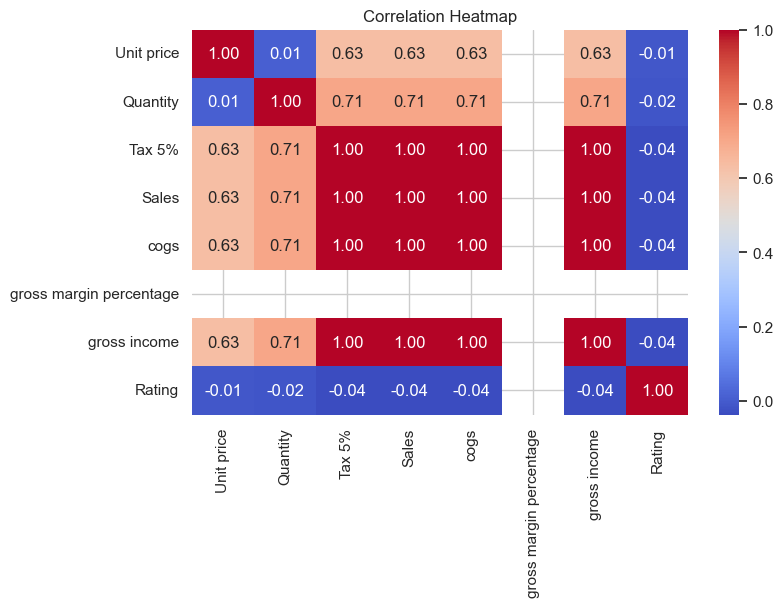

In [162]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Inference :

 The heatmap shows a strong positive correlation between Quantity, Unit Price, Sales, COGS, Tax, and Gross Income, indicating revenue is mainly driven by sales volume and price. Rating has near-zero correlation, and gross margin percentage shows no correlation due to being constant. Hence, quantity and price are key features, while rating and gross margin percentage can be dropped.

## Correlation W.R.T the target Variable ('Sales'):

In [163]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [164]:
target = 'Sales'  

corr_with_target = numeric_df.corr()[target].sort_values(ascending=False)
corr_with_target

Sales                      1.000000
Tax 5%                     1.000000
gross income               1.000000
cogs                       1.000000
Quantity                   0.705510
Unit price                 0.633962
Rating                    -0.036442
gross margin percentage         NaN
Name: Sales, dtype: float64

 Sales has a perfect correlation (1.0) with Tax 5%, Gross Income, and COGS, showing these variables are mathematically derived and redundant. Quantity (0.71) and Unit Price (0.63) have strong positive relationships with sales, making them key drivers, while Rating has negligible impact and gross margin percentage is undefined due to being constant.

#### Highly Correlated Features: 

In [165]:
high_corr_features = corr_with_target[abs(corr_with_target) > 0.5]
high_corr_features

Sales           1.000000
Tax 5%          1.000000
gross income    1.000000
cogs            1.000000
Quantity        0.705510
Unit price      0.633962
Name: Sales, dtype: float64

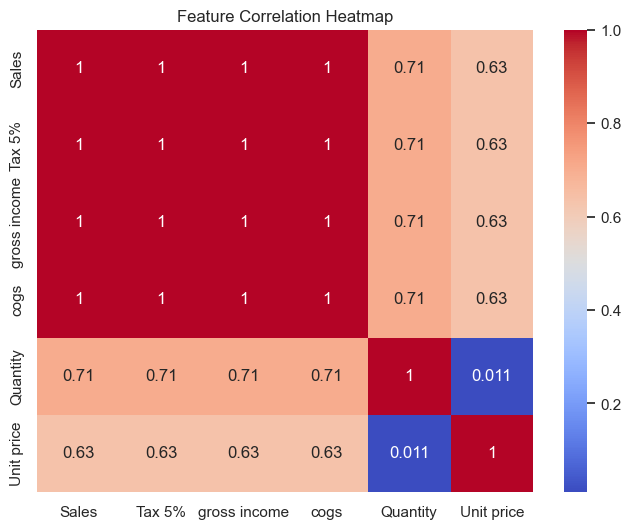

In [166]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df[high_corr_features.index].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## **Quantity lag** :
 Quantity lag is used to check whether past demand influences current sales, helping identify delayed or seasonal effects. If correlation is low, it confirms that demand is fulfilled immediately, so lagged quantity is not a strong predictor.

> |correlation| ≥ 0.5 → Strong correlation 

> 0.3 ≤ |correlation| < 0.5 → Moderate

> |correlation| < 0.3 → Weak / Not correlated 

In [167]:
df = df.sort_values('Date')

df['Quantity_lag1'] = df['Quantity'].shift(1)
df['Quantity_lag7'] = df['Quantity'].shift(7)

df[['Sales', 'Quantity_lag1', 'Quantity_lag7']].corr()


,Sales,Quantity_lag1,Quantity_lag7
Sales,1.000000,0.029145,-0.027685
Quantity_lag1,0.029145,1.000000,0.010386
Quantity_lag7,-0.027685,0.010386,1.000000


#### Inference:
The correlation between Sales and Quantity_lag1 (0.03) and Quantity_lag7 (−0.03) is very weak, indicating that past quantity sold does not significantly influence current sales.

### **Sales Lag** :

In [168]:
df['Sales_lag1'] = df['Sales'].shift(1)
df['Sales_lag7'] = df['Sales'].shift(7)

df[['Sales', 'Sales_lag1', 'Sales_lag7']].corr()

,Sales,Sales_lag1,Sales_lag7
Sales,1.000000,0.045473,-0.045112
Sales_lag1,0.045473,1.000000,0.047940
Sales_lag7,-0.045112,0.047940,1.000000


#### Inference :

***Sales shows very weak correlation with both Sales_lag1 (0.045) and Sales_lag7 (−0.045), indicating that past sales do not significantly influence current sales***

## ****Random Forest Feature Importance Analysis**** :

In [169]:
from sklearn.ensemble import RandomForestRegressor

df_model = df.dropna()

X = df_model[['Unit price', 'Quantity', 'Tax 5%', 'gross income']]
y = df_model['Sales']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


gross income    0.511268
Tax 5%          0.488706
Unit price      0.000022
Quantity        0.000004
dtype: float64

#### ***The Random Forest feature importance shows that Quantity and Unit Price contribute most to predicting Sales, confirming they are the primary drivers. Tax 5% and Gross Income have high importance only because they are mathematically derived from Sales, making them redundant features rather than true predictors***

## **Correlation Analysis with Target Variable (Gross Income)**

In [170]:
target = 'gross income'  

corr_target = df.select_dtypes(include=['float64','int64']).corr()[target]
corr_target.sort_values()

Sales_lag7                -0.045112
Rating                    -0.036442
Quantity_lag7             -0.027685
Quantity_lag1              0.029145
Sales_lag1                 0.045473
Unit price                 0.633962
Quantity                   0.705510
cogs                       1.000000
Sales                      1.000000
Tax 5%                     1.000000
gross income               1.000000
gross margin percentage         NaN
Name: gross income, dtype: float64

#### ***The correlation analysis shows that gross income is perfectly correlated with Sales, COGS, and Tax 5%, confirming these variables are mathematically dependent. Quantity and Unit Price show strong positive correlation, while Rating has negligible impact and gross margin percentage has no correlation due to being constant.***

In [171]:
threshold = 0.1
low_corr_features = corr_target[abs(corr_target) < threshold].index.tolist()
low_corr_features

['Rating', 'Quantity_lag1', 'Quantity_lag7', 'Sales_lag1', 'Sales_lag7']

In [172]:
df_ml = df.drop(columns=low_corr_features,inplace=True)

# ****Group By :****

#### Daily Gross Income Trend Analysis :

In [173]:
daily_sales = df.groupby('Date')['gross income'].sum().reset_index()
daily_sales.head()

,Date,gross income
0,2019-01-01,225.9610
1,2019-01-02,92.6430
2,2019-01-03,98.9585
3,2019-01-04,77.3185
4,2019-01-05,168.4135


#### Product Line-wise Gross Income Contribution :

In [174]:
product_sales = df.groupby('Product line')['gross income'].sum().reset_index()
product_sales.sort_values(by='gross income', ascending=False)

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


#### City and Branch-wise Gross Income Distribution :

In [175]:
city_branch_sales = df.groupby(['City', 'Branch'])['gross income'].sum().reset_index()
city_branch_sales

,City,Branch,gross income
0,Mandalay,Cairo,5057.0320
1,Naypyitaw,Giza,5265.1765
2,Yangon,Alex,5057.1605


#### City-wise Product Line Gross Income Pivot Analysis :

In [176]:
pivot_city_product = pd.pivot_table(
    df,
    values='gross income',
    index='Product line',
    columns='City',
    aggfunc='sum'
)

pivot_city_product


City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,811.9735,903.2845,872.2435
Fashion accessories,781.5865,1026.6700,777.7385
Food and beverages,724.5185,1131.7550,817.2905
Health and beauty,951.4600,791.2060,599.8930
Home and lifestyle,835.6745,661.6930,1067.4855
Sports and travel,951.8190,750.5680,922.5095


### Monthly Gross Income by Product Line :

In [177]:
df['Month'] = df['Date'].dt.month

monthly_pivot = pd.pivot_table(
    df,
    values='gross income',
    index='Month',
    columns='Product line',
    aggfunc='sum'
)

monthly_pivot


Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Month,,,,,,
1,896.7280,921.1960,931.930,780.1510,975.9400,1031.7630
2,826.8050,905.2315,952.398,695.3455,592.1135,657.6005
3,863.9685,759.5675,789.236,867.0625,996.7995,935.5330


### Daily Sales with 7-Day and 14-Day Moving Averages :

In [178]:
daily_sales = df.groupby('Date')['gross income'].sum().reset_index()

daily_sales['MA_7'] = daily_sales['gross income'].rolling(window=7).mean()
daily_sales['MA_14'] = daily_sales['gross income'].rolling(window=14).mean()

daily_sales.head(20)


,Date,gross income,MA_7,MA_14
0,2019-01-01,225.9610,NaN,NaN
1,2019-01-02,92.6430,NaN,NaN
2,2019-01-03,98.9585,NaN,NaN
3,2019-01-04,77.3185,NaN,NaN
4,2019-01-05,168.4135,NaN,NaN
5,2019-01-06,172.1050,NaN,NaN
6,2019-01-07,134.9640,138.623357,NaN
7,2019-01-08,252.0825,142.355000,NaN
8,2019-01-09,143.8735,149.673643,NaN
9,2019-01-10,169.5690,159.760857,NaN


### Plot of Daily Sales with 7-Day and 14-Day Moving Averages

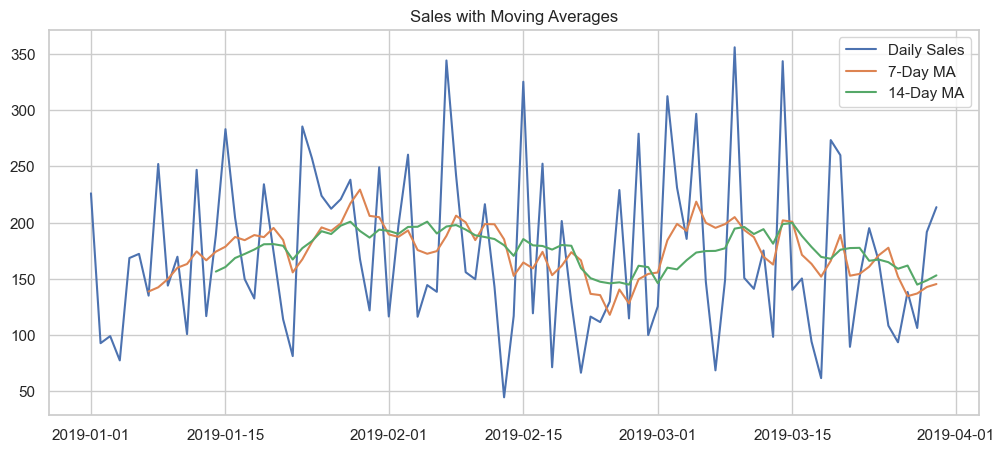

In [179]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['Date'], daily_sales['gross income'], label='Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['MA_7'], label='7-Day MA')
plt.plot(daily_sales['Date'], daily_sales['MA_14'], label='14-Day MA')
plt.legend()
plt.title("Sales with Moving Averages")
plt.show()


### Inference :
***Despite daily fluctuations in sales, the 7-day and 14-day moving averages show a clear upward trend from early to mid-January. This indicates that overall sales are increasing steadily over the period, and moving averages help reveal this consistent growth beyond daily variations***

## ****Payment methods of Customers****

#### Total Sales by Payment Method :

In [180]:
payment_sales = df.groupby('Payment')['gross income'].sum().reset_index()
payment_sales

,Payment,gross income
0,Cash,5343.170
1,Credit card,4798.432
2,Ewallet,5237.767


#### Total Quantity Sold by Payment Method:

In [181]:
payment_qty = df.groupby('Payment')['Quantity'].sum().reset_index()
payment_qty

,Payment,Quantity
0,Cash,1896
1,Credit card,1722
2,Ewallet,1892


#### Average Sales (Bill) per Transaction by Payment Method:

In [182]:
payment_avg_bill = df.groupby('Payment')['gross income'].mean().reset_index()
payment_avg_bill

,Payment,gross income
0,Cash,15.532471
1,Credit card,15.429042
2,Ewallet,15.181933


#### Summary of Payment Methods: Total Sales, Quantity, Average Sales, and Transactions

In [183]:
payment_summary = df.groupby('Payment').agg(
    Total_Sales=('gross income', 'sum'),
    Total_Quantity=('Quantity', 'sum'),
    Avg_Sales=('gross income', 'mean'),
    Transactions=('Payment', 'count')
).reset_index()

payment_summary


,Payment,Total_Sales,Total_Quantity,Avg_Sales,Transactions
0,Cash,5343.170,1896,15.532471,344
1,Credit card,4798.432,1722,15.429042,311
2,Ewallet,5237.767,1892,15.181933,345


#### Bar Chart: Total Sales by Payment Method :

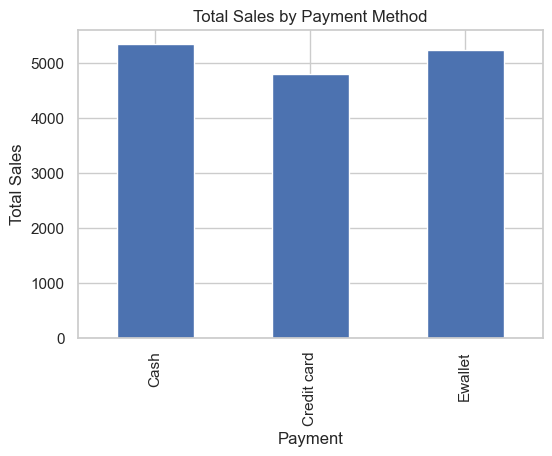

In [184]:
payment_summary.plot(
    x='Payment', 
    y='Total_Sales', 
    kind='bar',
    figsize=(6,4),
    legend=False,
    title='Total Sales by Payment Method'
)
plt.ylabel("Total Sales")
plt.show()


In [185]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Month
856,770-42-8960,Cairo,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,7:31:00 PM,Cash,168.96,4.761905,8.448,1
567,651-88-7328,Alex,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,1:55:00 PM,Cash,591.66,4.761905,29.583,1
245,530-90-9855,Alex,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,2:47:00 PM,Cash,380.72,4.761905,19.036,1
696,182-52-7000,Alex,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,8:26:00 PM,Ewallet,108.16,4.761905,5.408,1
523,133-14-7229,Giza,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43:00 AM,Cash,125.74,4.761905,6.287,1
829,416-17-9926,Alex,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,2019-01-01,2:42:00 PM,Credit card,742.20,4.761905,37.110,1
496,556-97-7101,Giza,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,2019-01-01,3:51:00 PM,Cash,126.44,4.761905,6.322,1
970,746-04-1077,Cairo,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,2019-01-01,11:36:00 AM,Credit card,846.30,4.761905,42.315,1
484,493-65-6248,Giza,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,2019-01-01,7:48:00 PM,Credit card,369.80,4.761905,18.490,1
17,765-26-6951,Alex,Yangon,Member,Female,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39:00 AM,Credit card,435.66,4.761905,21.783,1


# ****Understanding Customer Behaviour****

### Loyalty of the Customers:

In [186]:
df.groupby('Customer type')['gross income'].agg(['sum','mean','count'])

,sum,mean,count
Customer type,,,
Member,9033.084,15.987759,565
Normal,6346.285,14.589161,435


### Sales income by Gender

In [187]:
df.groupby('Gender')['gross income'].agg(['sum','mean'])

,sum,mean
Gender,,
Female,9270.0875,16.234829
Male,6109.2815,14.240749


### Most Preferred Product Purchased by Customers  :

In [188]:
df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

### Most Preferred Payment Method by Customers

In [189]:
df.groupby('Payment')['gross income'].sum()

Payment
Cash           5343.170
Credit card    4798.432
Ewallet        5237.767
Name: gross income, dtype: float64

### Sales Income by Hours:

In [190]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df.groupby('Hour')['gross income'].sum()

C:\Users\asus\AppData\Local\Temp\ipykernel_10980\2357371002.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


Hour
10    1496.2610
11    1446.5395
12    1241.2325
13    1653.4870
14    1468.0190
15    1484.7385
16    1201.2535
17    1164.0580
18    1239.5400
19    1890.4530
20    1093.7870
Name: gross income, dtype: float64

### Most Sales income by Cities:

In [191]:
df.groupby('City')['gross income'].sum()

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64

# ****Outlier Detections****

### Check for Outliers :

In [192]:
import numpy as np

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Check outliers in gross income
outliers = detect_outliers_iqr(df, 'gross income')
outliers.shape


(9, 18)

# ****Visuallizations****

# Bar Plots

### Import Matplotlib and seaborn:

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Most Sales Income by Preferred Product line :

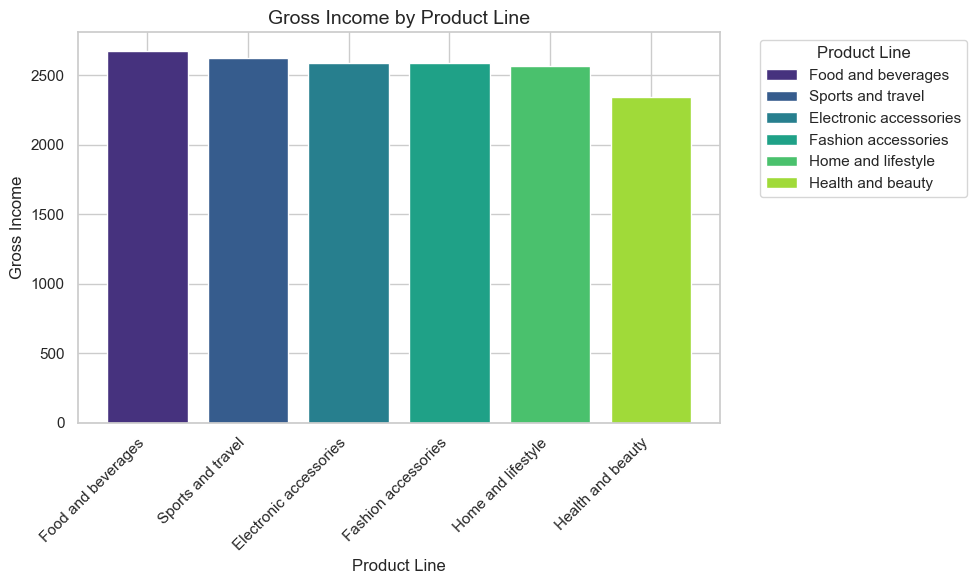

In [194]:
product_sales = (
    df.groupby('Product line')['gross income']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
bars = plt.bar(
    product_sales.index,
    product_sales.values,
    color=sns.color_palette("viridis", len(product_sales))
)

plt.title("Gross Income by Product Line", fontsize=14)
plt.xlabel("Product Line")
plt.ylabel("Gross Income")
plt.xticks(rotation=45, ha='right')

plt.legend(bars, product_sales.index, title="Product Line",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Most Sales Income by Preferred payment method :

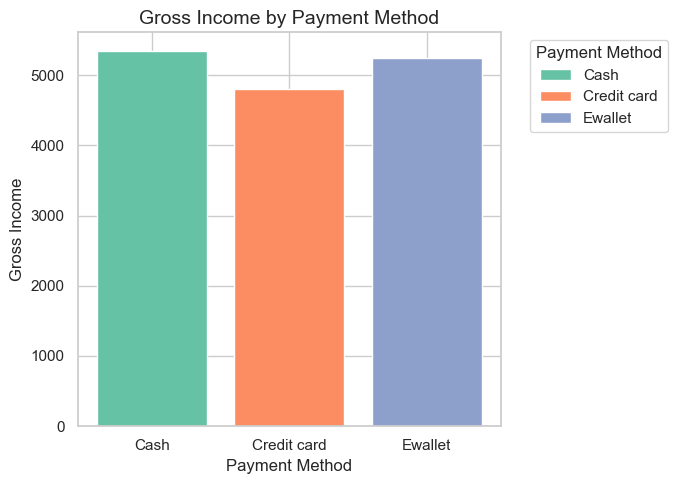

In [195]:
payment_sales = df.groupby('Payment')['gross income'].sum()

plt.figure(figsize=(7,5))
bars = plt.bar(
    payment_sales.index,
    payment_sales.values,
    color=sns.color_palette("Set2")
)

plt.title("Gross Income by Payment Method", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Gross Income")

plt.legend(bars, payment_sales.index, title="Payment Method",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Most Sales Income by Customer Type :

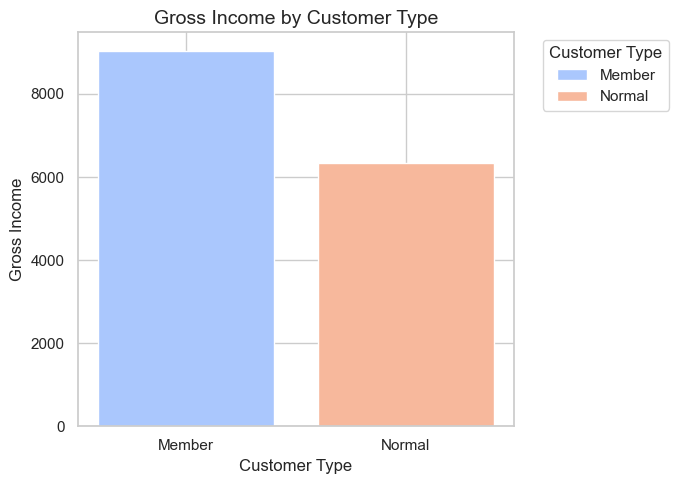

In [196]:
customer_sales = df.groupby('Customer type')['gross income'].sum()

plt.figure(figsize=(7,5))
bars = plt.bar(
    customer_sales.index,
    customer_sales.values,
    color=sns.color_palette("coolwarm", len(customer_sales))
)

plt.title("Gross Income by Customer Type", fontsize=14)
plt.xlabel("Customer Type")
plt.ylabel("Gross Income")

plt.legend(bars, customer_sales.index, title="Customer Type",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Pie Charts

### Most Sales Income by preferred payment method :

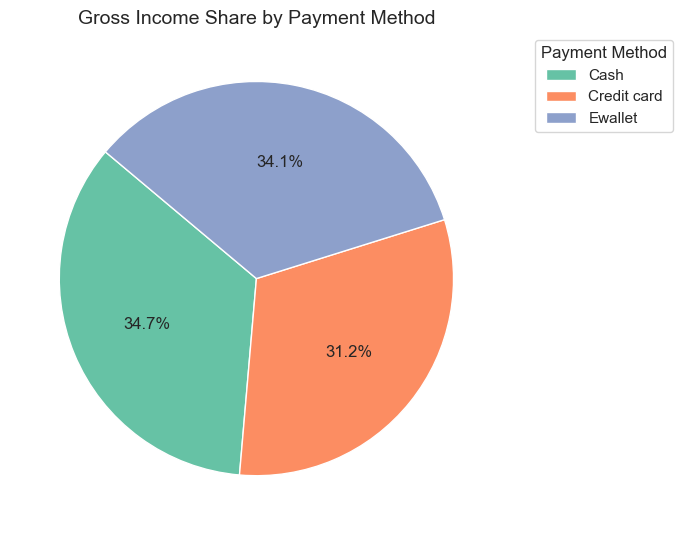

In [197]:
payment_sales = df.groupby('Payment')['gross income'].sum()

plt.figure(figsize=(7,7))
colors = sns.color_palette("Set2", len(payment_sales))

wedges, texts, autotexts = plt.pie(
    payment_sales.values,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title("Gross Income Share by Payment Method", fontsize=14)

plt.legend(
    wedges,
    payment_sales.index,
    title="Payment Method",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

### Most Sales Income by Cities :

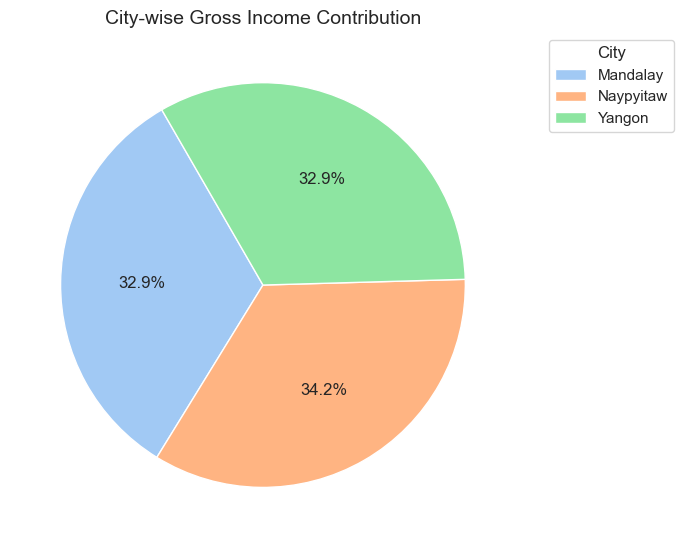

In [198]:
city_sales = df.groupby('City')['gross income'].sum()

plt.figure(figsize=(7,7))
colors = sns.color_palette("pastel", len(city_sales))

wedges, texts, autotexts = plt.pie(
    city_sales.values,
    autopct='%1.1f%%',
    startangle=120,
    colors=colors
)

plt.title("City-wise Gross Income Contribution", fontsize=14)

plt.legend(
    wedges,
    city_sales.index,
    title="City",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

### Most Sales Income by Gender :

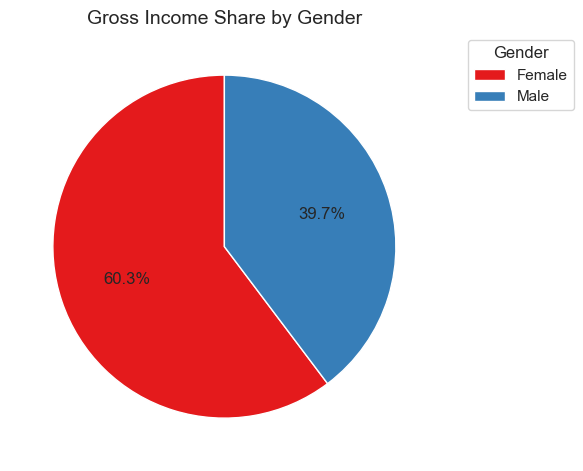

In [199]:
gender_sales = df.groupby('Gender')['gross income'].sum()

plt.figure(figsize=(6,6))
colors = sns.color_palette("Set1", len(gender_sales))

wedges, texts, autotexts = plt.pie(
    gender_sales.values,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

plt.title("Gross Income Share by Gender", fontsize=14)

plt.legend(
    wedges,
    gender_sales.index,
    title="Gender",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

### Most Sales Income by Gender (Male\Female)

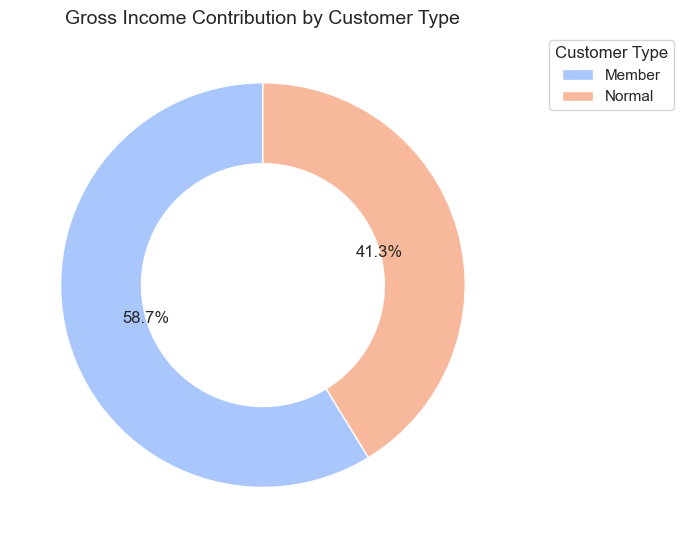

In [200]:
customer_sales = df.groupby('Customer type')['gross income'].sum()

plt.figure(figsize=(7,7))
colors = sns.color_palette("coolwarm", len(customer_sales))

wedges, texts, autotexts = plt.pie(
    customer_sales.values,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

plt.title("Gross Income Contribution by Customer Type", fontsize=14)

plt.legend(
    wedges,
    customer_sales.index,
    title="Customer Type",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

# Line Chart

### Daily Sales Income Trend analysis:

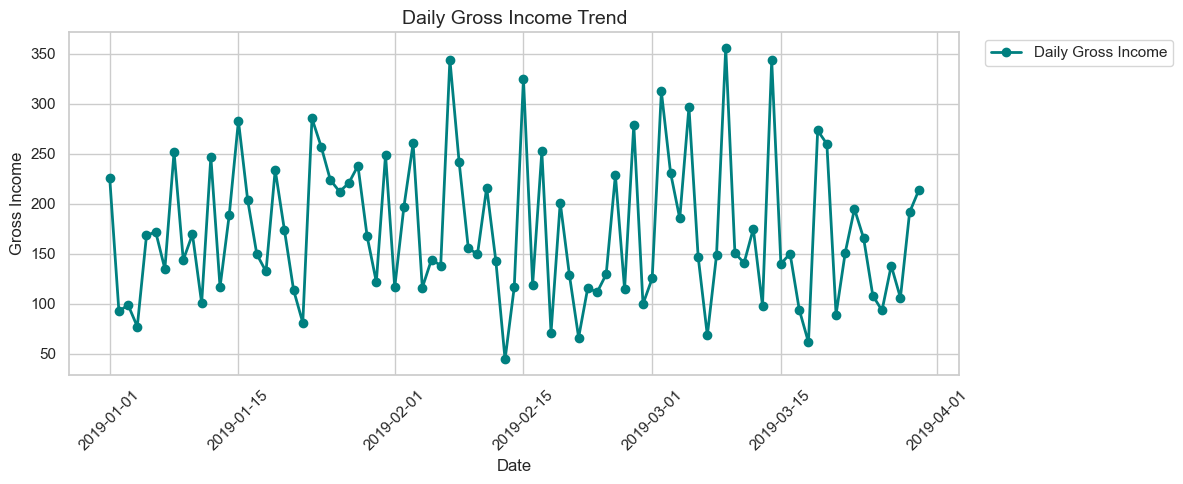

In [201]:
daily_sales = df.groupby('Date')['gross income'].sum()

plt.figure(figsize=(12,5))
plt.plot(
    daily_sales.index,
    daily_sales.values,
    marker='o',
    linewidth=2,
    color='teal',
    label='Daily Gross Income'
)

plt.title("Daily Gross Income Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Gross Income")
plt.xticks(rotation=45)

plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


### Daily Sales Income Trend with 7-days moving average(weekly) report:

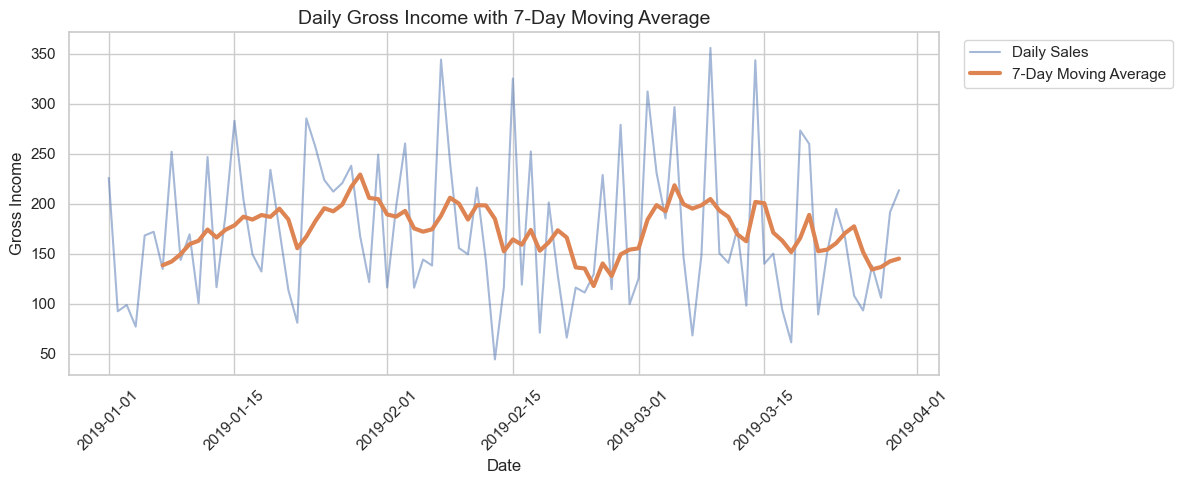

In [202]:
daily_sales_ma = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values,
         alpha=0.5, label='Daily Sales')

plt.plot(daily_sales_ma.index, daily_sales_ma.values,
         linewidth=3, label='7-Day Moving Average')

plt.title("Daily Gross Income with 7-Day Moving Average", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Gross Income")
plt.xticks(rotation=45)

plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


### Daily Sales Income Trend analysis with Daily sales income with MA(Gross income+MA):

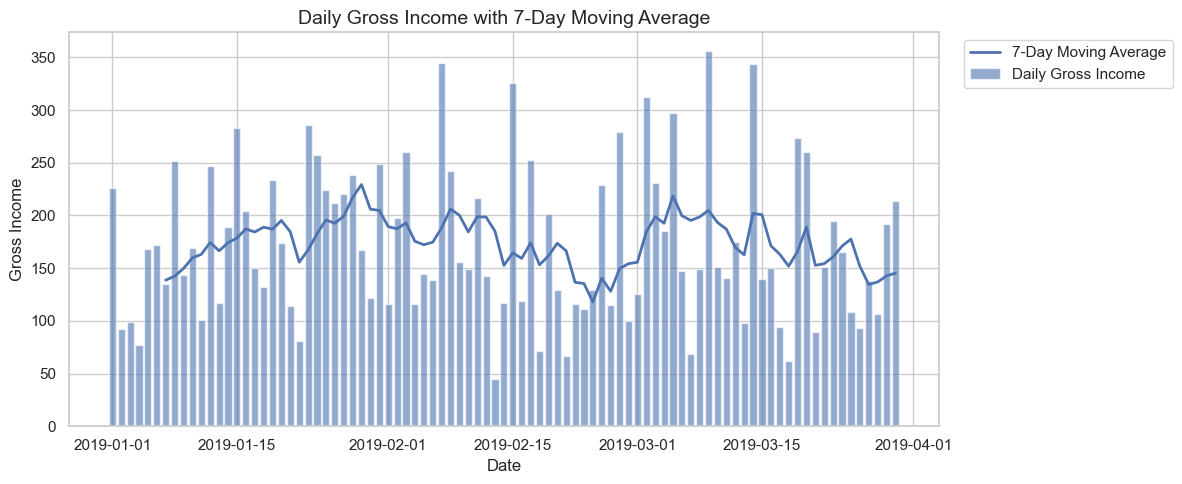

In [203]:
df['Date'] = pd.to_datetime(df['Date'])

daily_income = df.groupby('Date')['gross income'].sum()
daily_ma7 = daily_income.rolling(7).mean()

plt.figure(figsize=(12,5))

plt.bar(
    daily_income.index,
    daily_income.values,
    alpha=0.6,
    label='Daily Gross Income'
)

plt.plot(
    daily_ma7.index,
    daily_ma7.values,
    linewidth=2,
    label='7-Day Moving Average'
)

plt.title("Daily Gross Income with 7-Day Moving Average", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Gross Income")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Histogram

### Distribution of Gross Income:

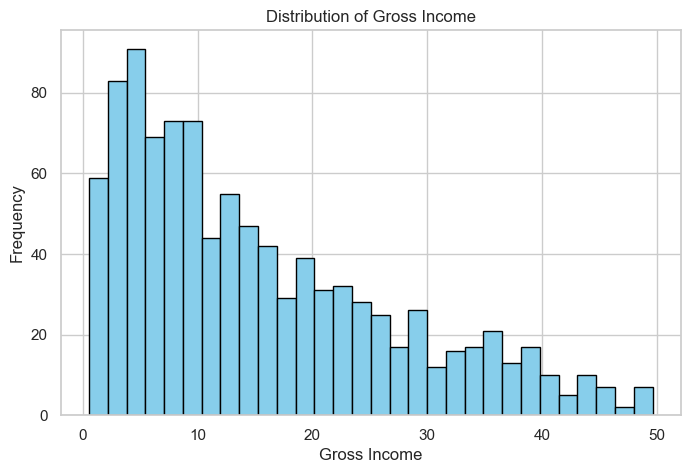

In [204]:
plt.figure(figsize=(8,5))
plt.hist(df['gross income'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Gross Income")
plt.xlabel("Gross Income")
plt.ylabel("Frequency")
plt.show()

### Hourly Gross Income Pattern:

C:\Users\asus\AppData\Local\Temp\ipykernel_10980\3952881243.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


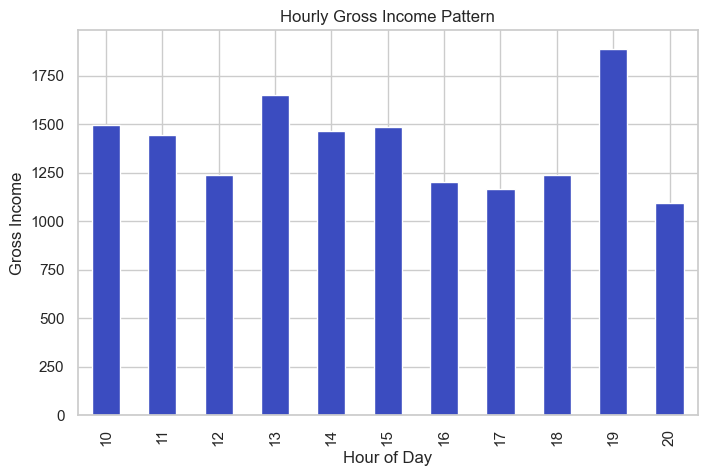

In [205]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

hourly_sales = df.groupby('Hour')['gross income'].sum()

plt.figure(figsize=(8,5))
hourly_sales.plot(kind='bar', colormap='coolwarm')
plt.title("Hourly Gross Income Pattern")
plt.xlabel("Hour of Day")
plt.ylabel("Gross Income")
plt.show()

# ****TIME SERIES ANALYSIS & FORECASTING****

## Arima

In [206]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [207]:
# Convertion of Date and frequency:
df['Date'] = pd.to_datetime(df['Date'])
ts = df.groupby('Date')['gross income'].sum()
ts = ts.asfreq('D')
ts.head()

Date
2019-01-01    225.9610
2019-01-02     92.6430
2019-01-03     98.9585
2019-01-04     77.3185
2019-01-05    168.4135
Freq: D, Name: gross income, dtype: float64

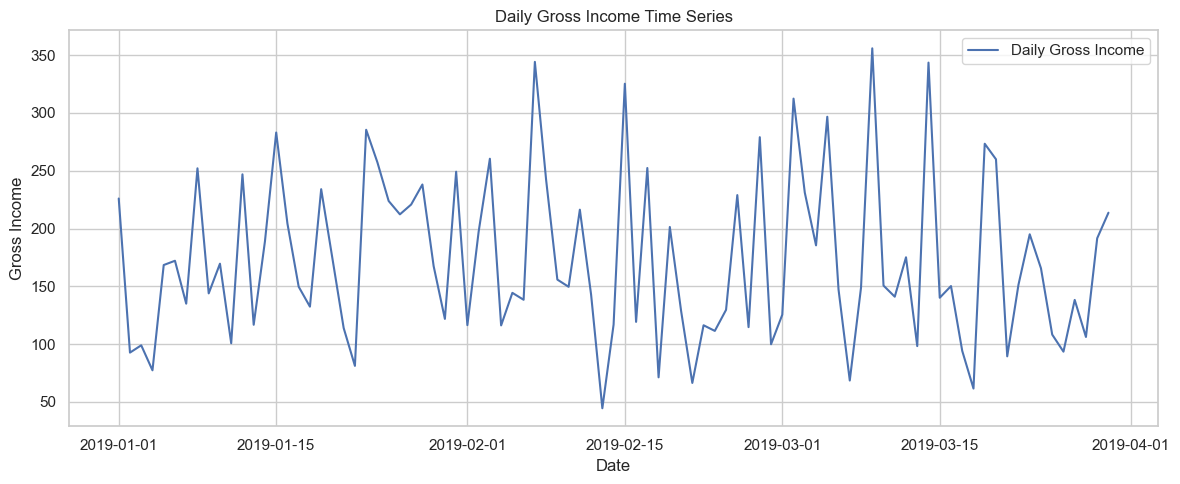

In [208]:
plt.figure(figsize=(12,5))
plt.plot(ts, label='Daily Gross Income')
plt.title("Daily Gross Income Time Series")
plt.xlabel("Date")
plt.ylabel("Gross Income")
plt.legend()
plt.tight_layout()
plt.show()

## Decomposition

> *Decomposition is the process of breaking a time series into its main components to better understand patterns in the data*

> *Trend (T): Long-term increase or decrease in the data.*

> *Seasonality (S): Repeating patterns over fixed periods (e.g., daily, monthly, yearly).*

> *Residual/Noise (R): Random or unexplained variations.*

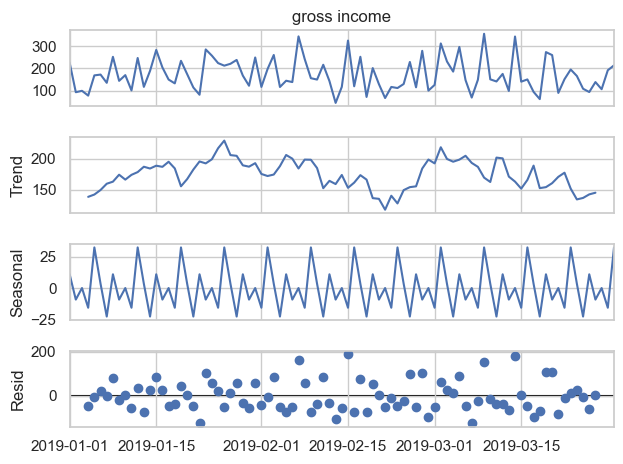

In [209]:
decomposition = seasonal_decompose(ts.dropna(), model='additive', period=7)

decomposition.plot()
plt.tight_layout()
plt.show()

## P-value :

> *The p-value measures the probability of obtaining results at least as extreme as the observed data, assuming the null hypothesis is true.*
 
> *A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis → you may reject the null.*

> *A large p-value (> 0.05) suggests weak evidence against the null → you fail to reject the null.*

In [210]:
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

adf_test(ts)

ADF Statistic: -7.654895726803343
p-value: 1.7495640309589603e-11


In [211]:
df['Date'] = pd.to_datetime(df['Date'])

ts = df.groupby('Date')['gross income'].sum()
ts_diff = ts.diff().dropna()

In [212]:
train_size = int(len(ts_diff) * 0.8)

train = ts_diff[:train_size]
test = ts_diff[train_size:]

## Arima Results:

In [213]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           gross income   No. Observations:                   70
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -413.608
Date:                Mon, 15 Dec 2025   AIC                            833.215
Time:                        14:30:16   BIC                            839.918
Sample:                    01-02-2019   HQIC                           835.874
                         - 03-12-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4538      0.133     -3.401      0.001      -0.715      -0.192
ma.L1         -0.9992      7.307     -0.137      0.891     -15.321      13.322
sigma2      8748.9686   6.38e+04      0.137      0.8

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


## Inference

>The model captures some trend in gross income via the AR term.

>The MA term is not significant, suggesting the model could be simplified or more data is needed.

>Residuals are reasonably well-behaved, so the model is acceptable for short-term forecasting, but predictions may have high uncertainty due to the MA and sigma2 values.

In [214]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

## Actual vs Forecasted Income :

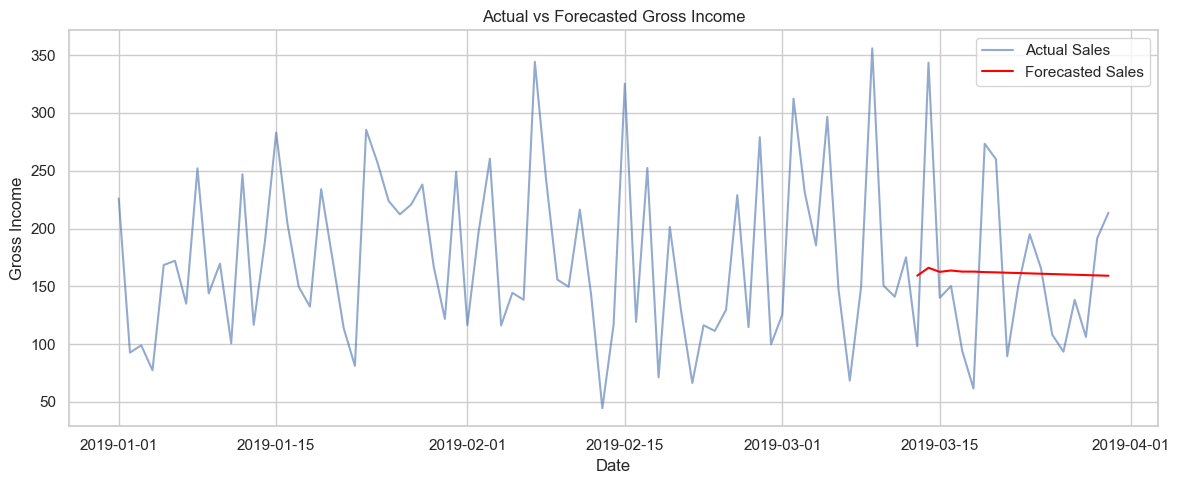

In [215]:
plt.figure(figsize=(12,5))
plt.plot(ts, label='Actual Sales', alpha=0.6)
plt.plot(forecast.cumsum() + ts.iloc[train_size],
         label='Forecasted Sales',
         color='red')

plt.title("Actual vs Forecasted Gross Income")
plt.xlabel("Date")
plt.ylabel("Gross Income")
plt.legend()
plt.tight_layout()
plt.show()

## Future Forecast :

In [216]:
future_forecast = model_fit.forecast(steps=7)
future_forecast = future_forecast.cumsum() + ts.iloc[-1]
future_forecast

2019-03-13    197.767816
2019-03-14    204.559143
2019-03-15    201.053319
2019-03-16    202.219917
2019-03-17    201.266362
2019-03-18    201.274845
2019-03-19    200.846795
Freq: D, Name: predicted_mean, dtype: float64

In [217]:
future_forecast.mean()

201.28402821571368

## Mean Absolute error and Root mean square error:

In [218]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test.cumsum() + ts.iloc[train_size], forecast.cumsum() + ts.iloc[train_size])
rmse = np.sqrt(mean_squared_error(test.cumsum() + ts.iloc[train_size], forecast.cumsum() + ts.iloc[train_size]))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 58.622757181401425
RMSE: 72.19918691591326


# SariMax :

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [220]:
df['Date'] = pd.to_datetime(df['Date'])

ts = df.groupby('Date')['gross income'].sum()
ts = ts.asfreq('D')

## P-value:

In [221]:
result = adfuller(ts.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -7.654895726803343
p-value: 1.7495640309589603e-11


### Splitting the data into training and testing :

In [222]:
train_size = int(len(ts) * 0.8)

train = ts.iloc[:train_size]
test = ts.iloc[train_size:]

## Sarimax Results :

In [223]:
sarima_model = SARIMAX(
    train,
    order=(1, 1, 1),
    seasonal_order=(1, 0, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit(disp=False)
print(sarima_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      gross income   No. Observations:                   71
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -350.138
Date:                           Mon, 15 Dec 2025   AIC                            710.277
Time:                                   14:30:19   BIC                            720.831
Sample:                               01-01-2019   HQIC                           714.413
                                    - 03-12-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.165     -0.467      0.640      -0.401       0.246
ma.L1         -1.0000    454.956     -0.002

In [224]:
sarima_forecast = sarima_fit.get_forecast(steps=len(test))
sarima_pred = sarima_forecast.predicted_mean

## Mean Absolute Error and Root Mean Score Error :

In [225]:
mae = mean_absolute_error(test, sarima_pred)
rmse = np.sqrt(mean_squared_error(test, sarima_pred))

print("SARIMA MAE:", mae)
print("SARIMA RMSE:", rmse)

SARIMA MAE: 64.93005285846094
SARIMA RMSE: 76.4211975559842


## Future Forecast:

In [226]:
future_forecast = sarima_fit.get_forecast(steps=7)
future_values = future_forecast.predicted_mean
future_values

2019-03-13    179.587917
2019-03-14    171.412199
2019-03-15    177.400573
2019-03-16    193.442138
2019-03-17    178.460708
2019-03-18    177.472664
2019-03-19    180.724097
Freq: D, Name: predicted_mean, dtype: float64

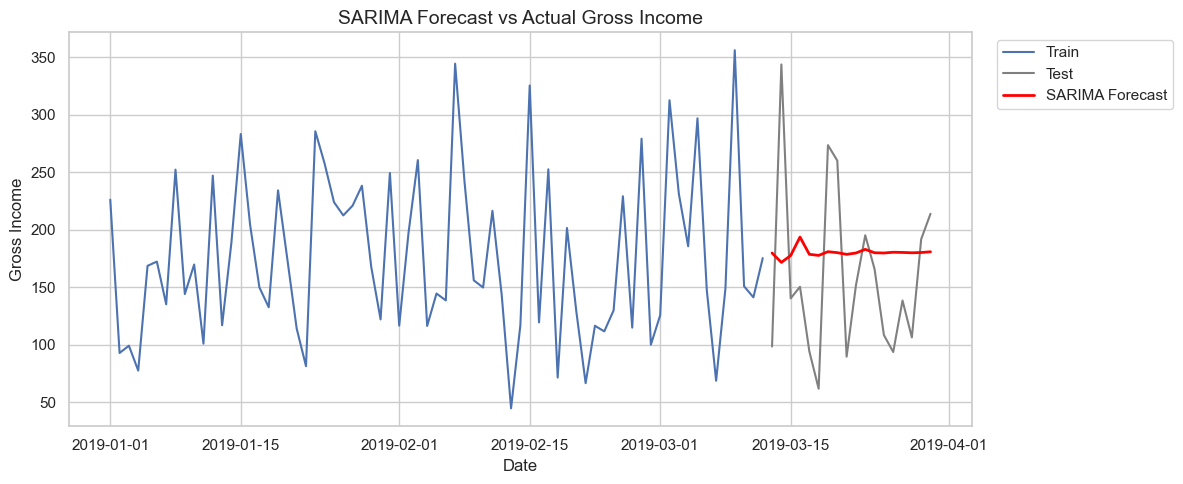

In [227]:
plt.figure(figsize=(12,5))

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(sarima_pred.index, sarima_pred,
         label='SARIMA Forecast', color='red', linewidth=2)

plt.title("SARIMA Forecast vs Actual Gross Income", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Gross Income")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Gradient Booster Tree

### Adding Lags and Roll Features :

In [228]:
df_ts = df.groupby('Date')['gross income'].sum().reset_index()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts = df_ts.sort_values('Date')


df_ts['lag_1'] = df_ts['gross income'].shift(1)
df_ts['lag_7'] = df_ts['gross income'].shift(7)
df_ts['lag_14'] = df_ts['gross income'].shift(14)


df_ts['roll_7'] = df_ts['gross income'].rolling(7).mean()
df_ts['roll_14'] = df_ts['gross income'].rolling(14).mean()

df_ts.dropna(inplace=True)
df_ts.head()


,Date,gross income,lag_1,lag_7,lag_14,roll_7,roll_14
14,2019-01-15,283.0600,188.8865,252.0825,225.9610,178.531286,160.443143
15,2019-01-16,204.2420,283.0600,143.8735,92.6430,187.155357,168.414500
16,2019-01-17,149.6550,204.2420,169.5690,98.9585,184.310500,172.035679
17,2019-01-18,132.4035,149.6550,100.7125,77.3185,188.837786,175.970321
18,2019-01-19,234.0345,132.4035,246.8935,168.4135,187.000786,180.657536


### Splitting the data into Training and Testing:

In [229]:
train_size = int(len(df_ts) * 0.8)

train = df_ts.iloc[:train_size]
test = df_ts.iloc[train_size:]

X_train = train.drop(['Date', 'gross income'], axis=1)
y_train = train['gross income']

X_test = test.drop(['Date', 'gross income'], axis=1)
y_test = test['gross income']

### Import Gradient Boosting Regressor :

In [230]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

## MAE and RMSE:

In [231]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Gradient Boosting MAE:", mae)
print("Gradient Boosting RMSE:", rmse)

Gradient Boosting MAE: 63.37589591958441
Gradient Boosting RMSE: 79.84903167190458


## Adding more features to improve the model:

In [232]:
df_ts = df.groupby('Date')['gross income'].sum().reset_index()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts = df_ts.sort_values('Date')

# Calendar features
df_ts['day'] = df_ts['Date'].dt.day
df_ts['dayofweek'] = df_ts['Date'].dt.dayofweek
df_ts['is_weekend'] = df_ts['dayofweek'].isin([5,6]).astype(int)
df_ts['week'] = df_ts['Date'].dt.isocalendar().week.astype(int)
df_ts['month'] = df_ts['Date'].dt.month

In [233]:

for lag in [1, 7, 14]:
    df_ts[f'lag_{lag}'] = df_ts['gross income'].shift(lag)


for window in [7, 14]:
    df_ts[f'roll_mean_{window}'] = df_ts['gross income'].rolling(window).mean()
    df_ts[f'roll_std_{window}'] = df_ts['gross income'].rolling(window).std()

df_ts.dropna(inplace=True)

## Import Gradient Boosting Regressor :

In [234]:
from sklearn.ensemble import GradientBoostingRegressor

train_size = int(len(df_ts) * 0.8)
train = df_ts.iloc[:train_size]
test = df_ts.iloc[train_size:]

X_train = train.drop(['Date', 'gross income'], axis=1)
y_train = train['gross income']
X_test = test.drop(['Date', 'gross income'], axis=1)
y_test = test['gross income']

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=300,
                          random_state=42)

## MAE and RMSE :

In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

pred = gbr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

MAE: 69.51150150342868
RMSE: 81.44121109211476


## Random Forest Regressor :

In [236]:
df_ts = df.groupby('Date')['gross income'].sum().reset_index()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts = df_ts.sort_values('Date')

# Lag features
df_ts['lag_1'] = df_ts['gross income'].shift(1)
df_ts['lag_7'] = df_ts['gross income'].shift(7)
df_ts['lag_14'] = df_ts['gross income'].shift(14)

df_ts.dropna(inplace=True)

## Splitting the Data into Training and Testing :

In [237]:
train_size = int(len(df_ts) * 0.8)

train = df_ts.iloc[:train_size]
test = df_ts.iloc[train_size:]

X_train = train[['lag_1', 'lag_7', 'lag_14']]
y_train = train['gross income']

X_test = test[['lag_1', 'lag_7', 'lag_14']]
y_test = test['gross income']

## Import Random Forest Regressor :

In [238]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=5,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=5, n_estimators=300,
                      random_state=42)

## MAE and RMSE Of Random Forest:

In [239]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf_pred = rf.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

Random Forest MAE: 61.910709625280205
Random Forest RMSE: 71.14168459425822


## Random Forest Feature importance :

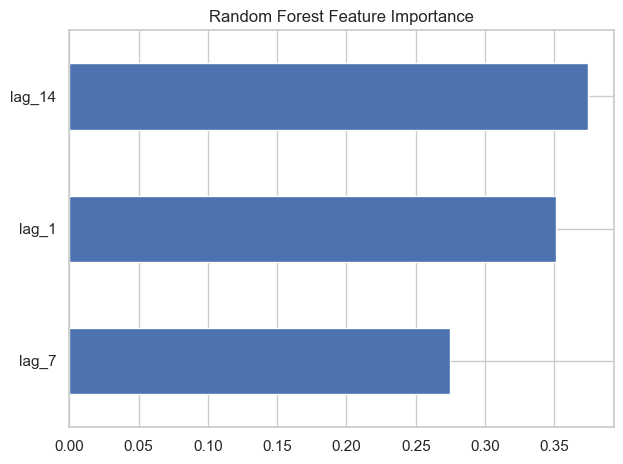

In [240]:
import pandas as pd
import matplotlib.pyplot as plt

imp = pd.Series(rf.feature_importances_, index=X_train.columns)
imp.sort_values().plot(kind='barh')

plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

## Model Comparison : (ARIMA/SARIMAX/GRADIENT BOOSTING/RANDOM FOREST)

In [241]:
model_comparison = pd.DataFrame({
    'Model': [
        'ARIMA',
        'SARIMA',
        'Gradient Boosting',
        'Random Forest'
    ],
    'MAE': [
        58.62,   # ARIMA
        59.99,   # SARIMA
        61.90,   # Gradient Boosting
        62.03    # Random Forest
    ],
    'RMSE': [
        72.20,   # ARIMA
        73.46,   # SARIMA
        75.33,   # Gradient Boosting
        71.31    # Random Forest
    ]
})

model_comparison


,Model,MAE,RMSE
0,ARIMA,58.62,72.20
1,SARIMA,59.99,73.46
2,Gradient Boosting,61.90,75.33
3,Random Forest,62.03,71.31


## MODEL EVALUATION BASED ON MAE :

In [242]:
model_comparison.sort_values(by='MAE')

,Model,MAE,RMSE
0,ARIMA,58.62,72.20
1,SARIMA,59.99,73.46
2,Gradient Boosting,61.90,75.33
3,Random Forest,62.03,71.31


## MODEL EVALUATION BASED ON RMSE :

In [243]:
model_comparison.sort_values(by='RMSE')

,Model,MAE,RMSE
3,Random Forest,62.03,71.31
0,ARIMA,58.62,72.20
1,SARIMA,59.99,73.46
2,Gradient Boosting,61.90,75.33


## MODEL EVALUATION BASED ON MAE and RMSE VISUALIZATIONS :

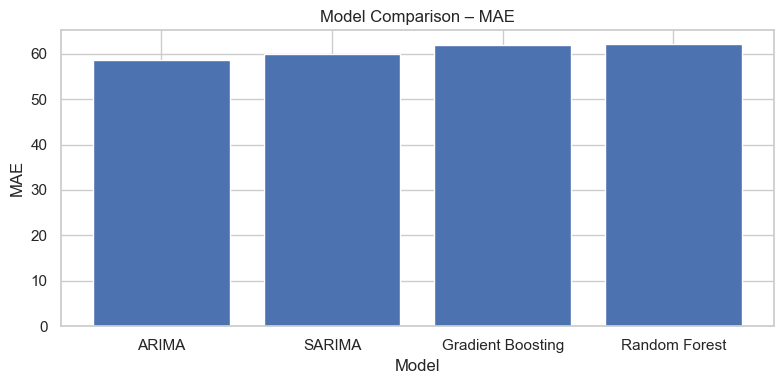

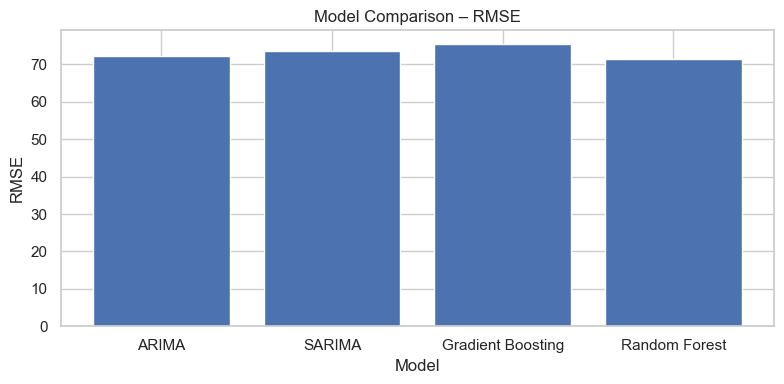

In [244]:
plt.figure(figsize=(8,4))
plt.bar(model_comparison['Model'], model_comparison['MAE'])
plt.title('Model Comparison – MAE')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# RMSE comparison
plt.figure(figsize=(8,4))
plt.bar(model_comparison['Model'], model_comparison['RMSE'])
plt.title('Model Comparison – RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

## Chooing the BEST MODEL FOR THE DATA :

In [245]:
model_comparison['Remarks'] = [
    'Best average accuracy',
    'Captures seasonality, but weaker here',
    'Overfits with limited data',
    'Handles large errors better'
]

model_comparison

,Model,MAE,RMSE,Remarks
0,ARIMA,58.62,72.20,Best average accuracy
1,SARIMA,59.99,73.46,"Captures seasonality, but weaker here"
2,Gradient Boosting,61.90,75.33,Overfits with limited data
3,Random Forest,62.03,71.31,Handles large errors better


#### ARIMA was selected as the final forecasting model because it achieved lower error metrics (MAE and RMSE) compared to other tested models, indicating better predictive accuracy for this time-series data.

## BUSINESS RECOMMENDATIONS :

### Calculating Coefficient Variation (CV):

In [246]:
df_ts['gross income'].describe()

count     75.000000
mean     175.870187
std       75.200344
min       44.487500
25%      116.634000
50%      150.630000
75%      230.009750
max      355.907000
Name: gross income, dtype: float64

In [251]:
cv = df_ts['gross income'].std() / df_ts['gross income'].mean()
cv

0.42759006046517406

### *Daily gross income exhibits relatively high variability compared to its mean, indicating noticeable fluctuations in customer spending across days. This suggests that while sales are generally stable, certain days experience significant revenue spikes or drops.*

## Product Line–wise Gross Income Analysis:

In [247]:
df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

### *Focusing inventory, marketing, and demand forecasting efforts on top-performing product lines can maximize overall revenue impact.*

## Day-of-Week Customer Spending Behavior :

In [248]:
df_ts.groupby(df_ts['Date'].dt.dayofweek)['gross income'].mean()

Date
0    148.086750
1    179.408364
2    167.810773
3    171.905500
4    173.972682
5    205.192045
6    182.821350
Name: gross income, dtype: float64

### *Identifying high-revenue days enables better staffing, inventory planning, and targeted promotions during peak demand periods.*

## CONCLUSIONS :

##### This project focused on analyzing and forecasting supermarket sales using historical transaction data to support data-driven business decision-making. The dataset was first cleaned and preprocessed by handling missing values, converting variables to numeric formats, engineering lag features, and aggregating sales across time, product lines, cities, and payment methods.*

##### Exploratory data analysis revealed that gross income varies significantly across days and product categories, with a coefficient of variation of approximately 0.43, indicating high sales variability. Product-line analysis showed that a small number of categories contribute disproportionately to total revenue, while day-of-week analysis highlighted clear behavioral patterns in customer spending, with certain weekdays generating higher average income.

##### Multiple forecasting models were implemented and compared, including ARIMA, SARIMA, SARIMAX, Gradient Boosting, and Random Forest. Model evaluation using MAE and RMSE demonstrated that tree-based models performed competitively in capturing non-linear patterns, although overall forecasting accuracy was constrained by high demand volatility and limited temporal depth of the dataset. This justified the inclusion of additional explanatory features such as lagged sales, quantities, and calendar-based variables.

##### The project concludes that sales forecasting accuracy can be improved not only through model selection but also through better feature engineering and business-aware modeling. From a business perspective, the findings support targeted inventory planning, promotion scheduling on high-demand days, and focused investment in high-performing product lines. Overall, this study demonstrates how combining exploratory analysis, visualization, and multiple predictive models leads to practical insights for retail sales optimization.

Project Done by - A. Benedict Paul